In [ ]:
import numpy as np
import pandas as pd

In [ ]:
!git clone https://github.com/hafidhfikri/Practice-Twitter-Sentiment-Analysis.git

Cloning into 'Practice-Twitter-Sentiment-Analysis'...
remote: Enumerating objects: 8, done.
remote: Total 8 (delta 0), reused 0 (delta 0), pack-reused 8
Unpacking objects: 100% (8/8), 1.87 MiB | 6.05 MiB/s, done.


In [ ]:
#load csv file
df_twt = pd.read_csv("Practice-Twitter-Sentiment-Analysis/train_E6oV3lV.csv")
df_twt.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
df_twt['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


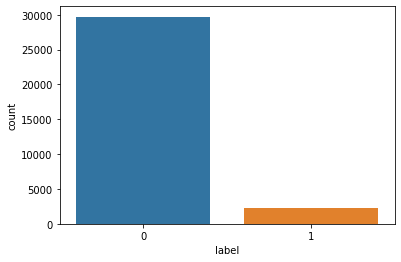

In [ ]:
import seaborn as sns
ax = sns.countplot(df_twt.label)

In [ ]:
# removing usernames from tweet
df_twt['new_tweet'] = df_twt.tweet.str.replace('@user', '')
df_twt.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [ ]:
#Removing Punctuations, Numbers, and Special Characters
#[a-zA-Z] = Any single character in the range a-z or A-Z
# ^ = Start of line
# $ = End of line

df_twt['new_tweet'] = df_twt['new_tweet'].str.replace("[^a-zA-Z#]", " ")
df_twt['new_tweet'] = df_twt['new_tweet'].str.replace("#", "")
df_twt.head()

<ipython-input-30-5fc4cdae614a>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df_twt['new_tweet'] = df_twt['new_tweet'].str.replace("[^a-zA-Z#]", " ")


,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can t use cause the...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...
4,5,0,factsguide: society now #motivation,factsguide society now motivation


In [ ]:
# get most common words in training dataset
from collections import Counter
all_words = []
for line in list(df_twt['new_tweet']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())


a=Counter(all_words).most_common(10)
a

[('the', 10238),
 ('to', 9866),
 ('i', 7622),
 ('a', 6540),
 ('you', 5949),
 ('and', 4945),
 ('in', 4704),
 ('for', 4510),
 ('of', 4261),
 ('is', 4196)]

In [ ]:
#tokenization
df_twt['new_tweet'] = df_twt['new_tweet'].apply(lambda x: x.split())
df_twt.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,"[when, a, father, is, dysfunctional, and, is, ..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[thanks, for, lyft, credit, i, can, t, use, ca..."
2,3,0,bihday your majesty,"[bihday, your, majesty]"
3,4,0,#model i love u take with u all the time in ...,"[model, i, love, u, take, with, u, all, the, t..."
4,5,0,factsguide: society now #motivation,"[factsguide, society, now, motivation]"


## Stemming
Stemming is the process of reducing a word to its base or root form. A stemmer is a program or algorithm that performs this process. Stemming can be useful in text mining applications where words are analyzed and compared, as it allows for different forms of a word to be treated as the same word, reducing the number of unique words in a corpus and improving computational efficiency. For example, a stemmer might reduce the words "jumping", "jumps", and "jumped" to the stem "jump". There are different stemmers available, such as the **Porter** stemmer and **Snowball** stemmer, each with their own specific rules and algorithms for stemming words.

The main difference between the two is that the Snowball stemmer is a more **aggressive** stemming algorithm than the Porter stemmer. It uses a set of more complex and aggressive rules to perform stemming. As a result, the Snowball stemmer can be more effective in reducing words to their root form, but it can also be more prone to over-stemming or producing stems that are not actually words.

The Porter stemmer, on the other hand, is a more **conservative** stemming algorithm. It uses a set of simpler and more intuitive rules to perform stemming. While the Porter stemmer may not be as aggressive as the Snowball stemmer, it is generally considered to produce more accurate stems.

In [ ]:
#stemmer
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

df_twt['new_tweet'] = df_twt['new_tweet'].apply(lambda x: [stemmer.stem(i) for i in x])
df_twt.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,"[when, a, father, is, dysfunct, and, is, so, s..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[thank, for, lyft, credit, i, can, t, use, cau..."
2,3,0,bihday your majesty,"[bihday, your, majesti]"
3,4,0,#model i love u take with u all the time in ...,"[model, i, love, u, take, with, u, all, the, t..."
4,5,0,factsguide: society now #motivation,"[factsguid, societi, now, motiv]"


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#stopwords = set(stopwords.words('english'))
stopwords = nltk.corpus.stopwords.words('english')

In [ ]:
newStopWords = ['u','go','got','via','or','ur','us','in','let','the','to','is','amp','make','one','day','days','get']
len(newStopWords)

18

In [ ]:
if all(elem in stopwords for elem in newStopWords):
    print("All words in list1 are in list2")
else:
    print("At least one word in list1 is not in list2")

At least one word in list1 is not in list2


In [ ]:
count = 0
for word in newStopWords:
    if word not in stopwords:
        count += 1

print(f"{count} words are not in the other list.")

13 words are not in the other list.


In [ ]:
stopwords.extend(newStopWords)

In [ ]:
import string
def process(text):
    # Check characters to see if they are in punctuation
    nopunc = set(char for char in list(text) if char not in string.punctuation)
    # Join the characters to form the string.
    nopunc = " ".join(nopunc)
    # remove any stopwords if present
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords]

In [ ]:
df_twt['new_tweet'] = df_twt['new_tweet'].apply(process)
df_twt.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,"[dysfunct, kid, selfish, father, run, drag]"
1,2,0,@user @user thanks for #lyft credit i can't us...,"[credit, lyft, wheelchair, disapoint, getthank..."
2,3,0,bihday your majesty,"[bihday, majesti]"
3,4,0,#model i love u take with u all the time in ...,"[love, model, take, time]"
4,5,0,factsguide: society now #motivation,"[societi, motiv, factsguid]"


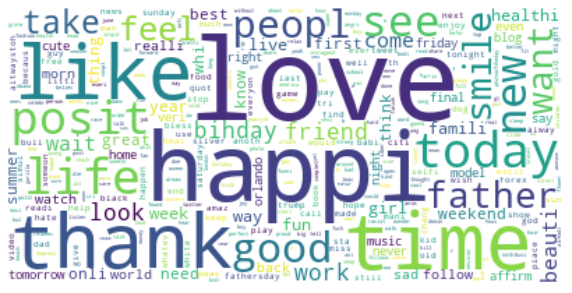

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# split sentences to get individual words
words = []
for line in df_twt['new_tweet']:
    words.extend(line)

# create a word frequency dictionary
wordfreq = Counter(words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
   ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
def string (text):
    to_return=""
    for i in list(text):
        to_return += str(i) + " "

    to_return = to_return[:-1]
    return to_return


df_twt['new_tweet'] = df_twt['new_tweet'].apply(string)
df_twt.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,dysfunct kid selfish father run drag
1,2,0,@user @user thanks for #lyft credit i can't us...,credit lyft wheelchair disapoint getthank than...
2,3,0,bihday your majesty,bihday majesti
3,4,0,#model i love u take with u all the time in ...,love model take time
4,5,0,factsguide: society now #motivation,societi motiv factsguid


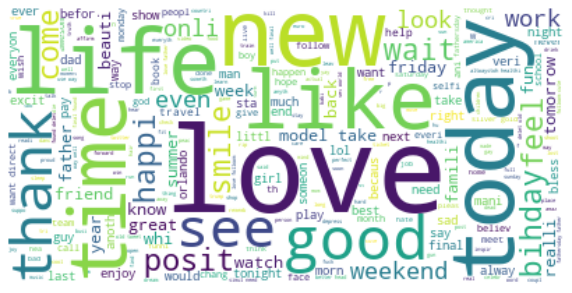

In [ ]:
positive = [r for r in df_twt['new_tweet'][df_twt['label']==0]]
pos = ''.join(positive)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
   ).generate(pos)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

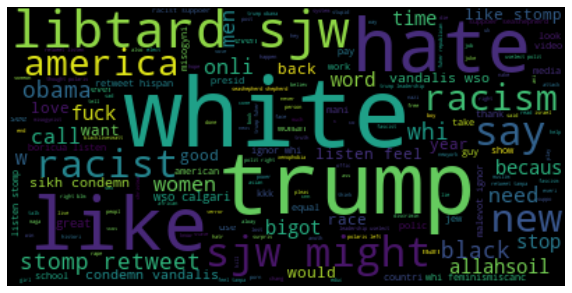

In [ ]:
negative = [r for r in df_twt['new_tweet'][df_twt['label']==1]]
neg = ''.join(negative)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color='black',
    max_words=2000,
    stopwords=stopwords
   ).generate(neg)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df_twt.drop(["id","tweet"], axis=1, inplace=True)
df_twt.head()

,label,new_tweet
0,0,dysfunct kid selfish father run drag
1,0,credit lyft wheelchair disapoint getthank than...
2,0,bihday majesti
3,0,love model take time
4,0,societi motiv factsguid


In [ ]:
#Split data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_twt["new_tweet"],
                                                    df_twt["label"], test_size = 0.2, random_state = 42)

print("training set :", x_train.shape, y_train.shape)
print("testing set :", x_test.shape, y_test.shape)

training set : (25569,) (25569,)
testing set : (6393,) (6393,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm='l2', sublinear_tf=True)

In [ ]:
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

print(x_train_counts.shape)
print(x_train_tfidf.shape)

(25569, 27304)
(25569, 27304)


In [ ]:
x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

print(x_test_counts.shape)
print(x_test_tfidf.shape)

(6393, 27304)
(6393, 27304)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200)
model.fit(x_train_tfidf, y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
predictions = model.predict(x_test_tfidf)

In [ ]:
#Accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)*100

96.23025183794776

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
confusion_matrix(y_test, predictions)

array([[5900,   37],
       [ 204,  252]])

In [ ]:
#f1-score
f1_score(y_test,predictions)

0.676510067114094

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=400 )
logmodel.fit(x_train_tfidf,y_train)

LogisticRegression(random_state=400)

In [ ]:
log_predictions = logmodel.predict(x_test_tfidf)

In [ ]:
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test, log_predictions)

array([[5925,   12],
       [ 309,  147]])

In [ ]:
f1_score(y_test,log_predictions)

0.47804878048780486

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,log_predictions)*100

94.97888315344909

In [ ]:
# !pip install xgboost

In [ ]:
import xgboost as xgb

# Create DMatrix from the training data
# create XGBClassifier object and train it
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train_tfidf, y_train)

XGBClassifier()

In [ ]:
xgb_predictions = xgb_model.predict(x_test_tfidf)

In [ ]:
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test, xgb_predictions)

array([[5922,   15],
       [ 353,  103]])

In [ ]:
f1_score(y_test, xgb_predictions)

0.3588850174216028

In [ ]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE object
sm = SMOTE(random_state=42)

# Fit SMOTE on training data
x_train_tfidf_resampled, y_train_resampled = sm.fit_resample(x_train_tfidf, y_train)

# Check the class distribution after resampling
print("After resampling:\n", y_train_resampled.value_counts())

After resampling:
 1    23783
0    23783
Name: label, dtype: int64


In [ ]:
model = RandomForestClassifier(n_estimators=200)
model.fit(x_train_tfidf_resampled, y_train_resampled)
predictions = model.predict(x_test_tfidf)
f1_score(y_test, predictions)

0.6816143497757847

In [ ]:
# Create DMatrix from the training data
xgb_resample = xgb.XGBClassifier()
xgb_resample.fit(x_train_tfidf_resampled, y_train_resampled)
xgb_pred_resample = xgb_resample.predict(x_test_tfidf)

In [ ]:
f1_score(y_test, xgb_pred_resample)

0.5501165501165501